In [30]:
# import packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

In [23]:
# Read data

def read_resumes(filepath):
    records = []
    
    with h5py.File(filepath, 'r') as f:
        for resumes_dset in f.values():
            attrs = { k:v for k,v in resumes_dset.attrs.items() }
            for row in resumes_dset:
                record = { c:v for c,v in zip(attrs["columns"], row) }
                record = { **record, **{c:v for c,v in zip(attrs["geometry-attrs"], attrs["geometry-parms"])} }
                record["geometry"] = attrs['geometry-type']
                records.append(record)
    return records            

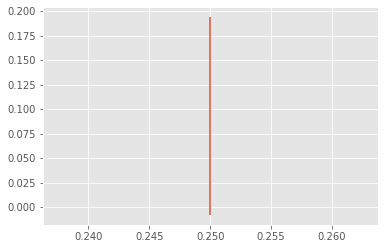

In [42]:
df = pd.DataFrame.from_records(read_resumes("../data/C2-H2.5/resumes.h5"))

with plt.style.context('ggplot'):
    for (beta, by_beta) in df.groupby('beta'):
        plt.errorbar(beta, by_beta['vortex_density'].mean(), yerr = by_beta['vortex_density'].std())